# Using Natural Language Processing to Enhance Google Reviews

### 1. Introduction 👋
For years, we have only looked at the numerical figure of ratings to determine the quality of food provided by a restaurant.  This, however, is only a surface level insight on what can be seen through a person's review.  By utilizing various techniques and using Exploratory Data Analyis, we can get a better understanding what lays beyond the initial figure provided by a rating, but the deeper details such as the sentimental score behind a review's content and the person's history of reviewing.  By looking further into this, we can make new discoveries beyond the usual bolded overall rating we all browse when evaluating a restaurant.

In [2]:
# imports all needed packages 📚
import pandas as pd
import numpy as np
import time
import random
from selenium import webdriver
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver import ActionChains
from selenium.webdriver.common.actions.wheel_input import ScrollOrigin
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os
import openai

In [3]:
# initialize website list to contain the urls of the restaurants
websiteList = ["https://www.google.com/maps/place/Hamilton+Restaurant/@40.201764,-77.191372,17z/data=!4m8!3m7!1s0x89c8e1d44c17cfc7:0xac2efe3616a14907!8m2!3d40.201764!4d-77.191372!9m1!1b1!16s%2Fg%2F1xpwkrks?authuser=0&hl=en&entry=ttu", # Hamilton Restaurant
               "https://www.google.com/maps/place/Carlisle+Diner/@40.2026131,-77.2060883,17z/data=!4m8!3m7!1s0x89c91e320a06d15d:0xe1dbb4a0023dc084!8m2!3d40.2026131!4d-77.2060883!9m1!1b1!16s%2Fg%2F1tgc0rdp?authuser=0&hl=en&entry=ttu", # Carlisle Diner
               "https://www.google.com/maps/place/John's+Hideaway+Restaurant/@40.2061268,-77.1961644,17z/data=!4m8!3m7!1s0x89c91fd53626cd1d:0xc510f84e59b13222!8m2!3d40.2061268!4d-77.1961644!9m1!1b1!16s%2Fg%2F1ts3glcr?authuser=0&hl=en&entry=ttu", # John's Hideaway Restaurant
               "https://www.google.com/maps/place/Fay's+Country+Kitchen/@40.1981102,-77.1893587,17z/data=!4m8!3m7!1s0x89c8e1d6cf578f9b:0x9bd06921dc54c927!8m2!3d40.1981102!4d-77.1893587!9m1!1b1!16s%2Fg%2F1tmplgvh?authuser=0&hl=en&entry=ttu", # Fay's Country Kitchen
               "https://www.google.com/maps/place/Kimberly's+Cafe+%26+Creamery/@40.2022222,-77.2008333,17z/data=!4m8!3m7!1s0x89c91e2c0d3c4e6f:0xea8f62338ebcf2fe!8m2!3d40.2022222!4d-77.2008333!9m1!1b1!16s%2Fg%2F1v6l8gc2?authuser=0&hl=en&entry=ttu", # Kimberly's Cafe & Creamery
               "https://www.google.com/maps/place/Grandma+Stamm%E2%80%99s/@40.2011659,-77.1872362,17z/data=!4m8!3m7!1s0x89c8e1d3bcf8f469:0xec48bede91c36001!8m2!3d40.2011659!4d-77.1872362!9m1!1b1!16s%2Fg%2F1vnrrl58?authuser=0&hl=en&entry=ttu", # Grandma Stamm's
               "https://www.google.com/maps/place/Wendy's/@40.1956693,-77.1896598,17z/data=!4m8!3m7!1s0x89c8e1d744731dcd:0xd9a640795a4e2b58!8m2!3d40.1956693!4d-77.1896598!9m1!1b1!16s%2Fg%2F1thssbx1?authuser=0&hl=en&entry=ttu", # Wendy's
               "https://www.google.com/maps/place/Walnut+Bottom+Diner/@40.1848133,-77.2106969,17z/data=!4m8!3m7!1s0x89c91e166469a719:0x755e9431f36f3502!8m2!3d40.1848133!4d-77.2106969!9m1!1b1!16s%2Fg%2F11b6t9_wz8?authuser=0&hl=en&entry=ttu", # Walnut Bottom Diner
               "https://www.google.com/maps/place/Cracker+Barrel+Old+Country+Store/@40.186866,-77.1900774,17z/data=!4m8!3m7!1s0x89c8e1de428ebf7f:0xb341ff1aef62b2d3!8m2!3d40.186866!4d-77.1900774!9m1!1b1!16s%2Fg%2F1tfd3ch8?authuser=0&hl=en&entry=ttu", # Cracker Barrel Old Country Store
               "https://www.google.com/maps/place/Chick-fil-A/@40.1906576,-77.1913566,17z/data=!4m8!3m7!1s0x89c8e1d925e3bdd3:0x1de64cb42e8e6c92!8m2!3d40.1906576!4d-77.1913566!9m1!1b1!16s%2Fg%2F11g9q2rbkg?authuser=0&hl=en&entry=ttu", # Chick-fil-A
               "https://www.google.com/maps/place/PB's+Kitchen+with+Southern+Smoke/@40.2010241,-77.2002745,17z/data=!4m8!3m7!1s0x89c91f527b86a979:0x27d898ba1fa59b7e!8m2!3d40.2010241!4d-77.2002745!9m1!1b1!16s%2Fg%2F11fpqd7lpb?authuser=0&hl=en&entry=ttu", # PB's Kitchen with Southern Smoke
               "https://www.google.com/maps/place/The+Sunrise+Cafe'+Sandwich+Shop/@40.2052558,-77.1883928,17z/data=!4m8!3m7!1s0x89c8e1a9b601ef37:0x778641030e061387!8m2!3d40.2052558!4d-77.1883928!9m1!1b1!16s%2Fg%2F11h6qyhy2p?authuser=0&hl=en&entry=ttu", # The Sunrise Cafe' Sandwich Shop
               "https://www.google.com/maps/place/Grazery/@40.201578,-77.193159,17z/data=!4m8!3m7!1s0x89c8e1d5956bc18f:0xefe21f7dd48fdde4!8m2!3d40.201578!4d-77.193159!9m1!1b1!16s%2Fg%2F11fxf7k3yz?authuser=0&hl=en&entry=ttu", # Grazery
               "https://www.google.com/maps/place/One13+Social/@40.2019509,-77.192054,17z/data=!4m8!3m7!1s0x89c8e1e1517456f1:0xdee5c6e9b9690dd4!8m2!3d40.2019509!4d-77.192054!9m1!1b1!16s%2Fg%2F11pd_mg7tq?authuser=0&hl=en&entry=ttu", # One13 Social
               "https://www.google.com/maps/place/Taqueria+Laurita/@40.2016602,-77.193038,17z/data=!4m8!3m7!1s0x89c8e1d5b6ae000b:0xffcc62999e2f9629!8m2!3d40.2016602!4d-77.193038!9m1!1b1!16s%2Fg%2F11b7hjrfcs?authuser=0&hl=en&entry=ttu", # Taqueria Laurita
               "https://www.google.com/maps/place/MISENO'S+RISTRO+PUB/@40.2023086,-77.2018737,17z/data=!4m8!3m7!1s0x89c91e2c3ec8af5b:0xfc2ef8c8c62de5c1!8m2!3d40.2023086!4d-77.2018737!9m1!1b1!16s%2Fg%2F11bbrgtfgg?authuser=0&hl=en&entry=ttu", # Miseno's Ristro Pub
               "https://www.google.com/maps/place/Fairgrounds+Diner/@40.2143836,-77.1866553,17z/data=!4m8!3m7!1s0x89c8e02f7ce2d7c3:0x5158d206af53e896!8m2!3d40.2143836!4d-77.1866553!9m1!1b1!16s%2Fg%2F1tfj43xv?authuser=0&hl=en&entry=ttu", # Fairgrounds Diner
               "https://www.google.com/maps/place/McDonald's/@40.1860281,-77.2108408,17z/data=!4m8!3m7!1s0x89c91e16153afb1f:0x5d4f7f2045ccfe02!8m2!3d40.1860281!4d-77.2108408!9m1!1b1!16s%2Fg%2F1td6nmmx?authuser=0&hl=en&entry=ttu", # McDonald's
               "https://www.google.com/maps/place/Miseno+II+Pizzeria+%26+Italian/@40.2022887,-77.2019711,17z/data=!4m8!3m7!1s0x89c91e2c3ec8af5b:0x55e9bf983177353f!8m2!3d40.2022887!4d-77.2019711!9m1!1b1!16s%2Fg%2F1vl5hrpt?authuser=0&hl=en&entry=ttu", # Miseno II Pizzeria & Italian
               "https://www.google.com/maps/place/Issei+Noodle/@40.2015276,-77.1913104,17z/data=!4m8!3m7!1s0x89c8e1d44c102853:0x94cb019c2f95dfe7!8m2!3d40.2015276!4d-77.1913104!9m1!1b1!16s%2Fg%2F1tj342y5?authuser=0&hl=en&entry=ttu"] # Issei Noodle

# initalize name list to contain the names of the restaurants
nameList = ["HamiltonRestaurant", "CarlisleDiner", "JohnsHideawayRestaurant", "FaysCountryKitchen", "KimberlysCafeAndCreamery",
            "GrandmaStamms", "Wendys", "WalnutBottomDiner", "CrackerBarrelOldCountryStore", "ChickFila", "PBsKitchenwithSouthernSmoke",
            "TheSunriseCafeSandwichShop", "Grazery", "One13Social", "TaqueriaLaurita", "MisenosRistroPub", "FairgroundsDiner",
            "McDonalds", "MisenoIIPizzeriaItalian", "IsseiNoodle"]

### 2. The .csv file  📁
The googlereviews.csv file contains 7455 datapoints in 6 columns (restaurant, content, names, stats, time, rating).

restaurant: name of the restaurant
content: the text of the review
name: name of the reviewer
stats: Local Guide Status (yes/no), total reviews, total photos
time: how long ago a review was posted
rating: the rating provided by the reviewer (1-5)

In [ ]:
# define scroll func
def scroll(num, driver):
    # have the function sleep for a second to prevent potential captchas due to extensive requests within a short time period ⏰
    time.sleep(1)
    # find the review element so we can use it as a destination for our function to scroll down to
    scroll_element = driver.find_element('class name', 'jJc9Ad')
    # assigns an origin point to scroll down from
    scroll_origin = ScrollOrigin.from_element(scroll_element)
    # uses ActionChains on our driver to scroll as far as we can with our loaded page
    ActionChains(driver)\
        .scroll_from_origin(scroll_origin, 0, 1000000)\
        .perform()

# initalize count value to -1 to prevent negative index error
count = -1
# initialize reviews list
reviews = []

# iterate through the websites within websiteList
for ele in websiteList:
    # initialize a start_time for measuring how long each particular element ele took to complete
    start_time = time.time()
    # increment count by 1
    count = count + 1
    # initialize our Chrome Webdriver that we will use to conduct our web scraping
    driver = webdriver.Chrome(ChromeDriverManager().install())
    # print ele to keep track of what website is currently being scraped for data
    print(ele)
    # use our driver to load up the website we are currently attempting to scrape
    driver.get(ele)
    # obtain the total amount of reviews for the current restaurant
    reviewstotal_element = driver.find_element('xpath', '/html/body/div[2]/div[3]/div[8]/div[9]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[2]/div/div[2]/div[3]')
    # convert the total reviews element into a text string
    reviewstotal = reviewstotal_element.text
    # remove commas from the total reviews text string to allow for string to integer conversion
    reviewstotal = reviewstotal.replace(",", "")
    # strip reviews from our total reviews text string and then convert the result into an integer representation
    reviewstotal = int(reviewstotal.strip(" reviews"))
    # print the number of total reviews for the current restaurant
    print(reviewstotal)

    # initalize a start_time for the loading process for the restaurant
    load_start_time = time.time()
    # scroll to the bottom of the web page reviewstotal/4 times to load all of the available reviews
    for i in range(int(reviewstotal/4)):
        # print i to keep track of the loading process
        print(i)
        # use the scroll function on our driver to scroll i number of times
        scroll(i, driver)
    # print the total seconds elapsed during the loading process for the restaurant
    print("Loading Total --- %s seconds ---" % (time.time() - load_start_time))
    
    # initalize a start_time for the clicking process for the restaurant
    click_start_time = time.time()
    # find all of the "More" elements within each review to expand the content of the review to its full length
    button = driver.find_elements('class name', 'w8nwRe')
    # iterate through the "More" elements on the restaurant's Google Maps web page
    for el in button:
        # click each "More" element to fully load each review's text content
        el.click()
    # print the total seconds elapsed during the clicking process for the restaurant
    print("Clicking Total --- %s seconds ---" % (time.time() - click_start_time))
    
    # find all of the review elements on the restaurant's Google Maps web page
    elements = driver.find_elements('class name', 'jJc9Ad') # elements
    
    # initialize a start_time for the element obtainment of content, name, stats, time, and rating for the restaurant 
    element_start_time = time.time()
    # iterate through each review elements in our list of elements
    for el in elements:
        # use a try statement for obtaining all of our necessary elements
        try:
            # obtain the content element of the review and directly convert it into a string text
            element_content = el.find_element('class name', 'wiI7pd').text
            # obtain the name element of the review and directly convert it into a string text
            element_name = el.find_element('class name', 'd4r55').text
            # obtain the stats element of the review and directly convert it into a string text
            element_stats = el.find_element('class name', 'RfnDt').text
            # obtain the time element of the review and directly convert it into a string text
            element_time = el.find_element('class name', 'rsqaWe').text
            # obtain the rating elements of the review and use len to total the amount of stars in the rating
            element_rating = len(element_rating.find_elements('class name', 'vzX5Ic'))
            # append the restaurant name, review content, reviewer's name, reviewer's stats,
            # amount of time elapsed since post, and review's rating to our list of reviews
            reviews.append([nameList[count], element_content, element_name, element_stats, element_time, element_rating])
        # use a fail statement to allow for easy examination where an error has occured in the process above
        except:
            # prints fail if any of the elements above not obtained correctly or not appended correctly
            print("fail")
    # prints the total seconds elapsed during the element obtainment process for the restaurant
    print("Element Total --- %s seconds ---" % (time.time() - element_start_time))
    # prints the total seconds elapsed during all of the processes above for the restaurant 
    print("Website Total --- %s seconds ---" % (time.time() - start_time))

📌 This process allows us to scrape all of the necessary data for the restaurants we are researching.  We are utilizing a scroll action to load all of the reviews for the given restaurants and then using our click function to load each review fully.  By going through each of the required elements, we are able to combine all of this information to provide an insight on each review in terms of restaurant reviewed, content written, rating given, when the review was posted, total reviews & photos by the reviewers, and their status (Local Guide or Normal Reviewer).

In [4]:
# loads the pandas dataframe for reviews obtained from running the code above
df_reviews = pd.read_csv(r"C:\Users\micha\Downloads\googlereviews.csv")

# set display settings to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 999)
pd.set_option('display.width', 999)
# prevents pandas from cutting jobdesc short
pd.set_option('display.max_colwidth', 200)

# print the first five reviews within the reviews dataframe
df_reviews.head()

,restaurant,content,name,stats,time,rating
0,HamiltonRestaurant,"I cannot say enough good things about this place. It was really crowded due to the ice fest of all, but we still got waited on really quickly. Our food was out in less than 10 minutes. The hot dog...",Linda Duncan,Local Guide · 438 reviews · 945 photos,2 months ago,5
1,HamiltonRestaurant,"We just got take out tonight. Anytime I go to the Hamilton it is Hotchee Dogs with everything for me. The dogs are always great, and the service is great too! The staff at the Hamilton is always s...",Greg Musser,9 reviews · 2 photos,2 months ago,5
2,HamiltonRestaurant,"Missed this restaurant last time we were here on business. It's cash only! The waitress was a very wonderful older woman with a bursting personality. She brought us a chili dog to share, just...",Diane Zuber,Local Guide · 265 reviews · 502 photos,5 months ago,5
3,HamiltonRestaurant,"Authentic gyro!!! Everything is highest quality!!! The staff is legendary. Friendly, clean, quick, delicious. Worth a special trip. Tommy is iconic 💗",Dory Maguire,10 reviews · 29 photos,4 months ago,5
4,HamiltonRestaurant,The hot dog was good.\nThe crab cakes a bit dry.\nThe omelette was ok.\nWe enjoyed our visit though and you should visit for historic sake.,Ryan Donald,"Local Guide · 721 reviews · 3,184 photos",8 months ago,5


In [5]:
# print the total number of restaurants present in the dataset
print("There are {:,} unique restaurants in the dataset.".format(len(df_reviews['restaurant'].unique())))
# print the names of the restaurants present in the dataset
print(df_reviews['restaurant'].unique())

There are 20 unique restaurants in the dataset.
['HamiltonRestaurant' 'CarlisleDiner' 'JohnsHideawayRestaurant'
 'FaysCountryKitchen' 'KimberlysCafeAndCreamery' 'GrandmaStamms' 'Wendys'
 'WalnutBottomDiner' 'CrackerBarrelOldCountryStore' 'ChickFila'
 'PBsKitchenwithSouthernSmoke' 'TheSunriseCafeSandwichShop' 'Grazery'
 'One13Social' 'TaqueriaLaurita' 'MisenosRistroPub' 'FairgroundsDiner'
 'McDonalds' 'MisenoIIPizzeriaItalian' 'IsseiNoodle']


### 3. Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

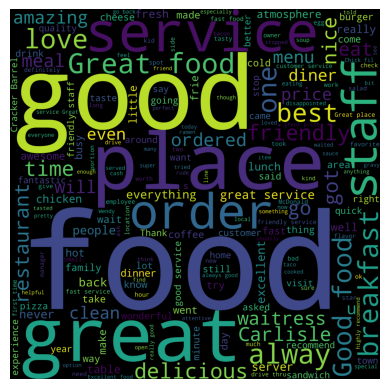

In [6]:
# initialize list
list = []
# for i in range() loop where range is length of df_out
for i in range(len(df_reviews)):
    # initialize words to the split jobdesc column of df_out
    words = df_reviews['content'].iloc[i].split()
    # for word in words loop to iterate through every item in words
    for word in words:
        # append word to list
        list.append(word)
# initialize text as the join of ' ' and list
text = (' ').join(list)
# create a word_cloud with width 2000 and height 2000
word_cloud = WordCloud(width = 4000, height = 4000).generate(text)
# show the word_cloud
plt.imshow(word_cloud)
# turn the axis off
plt.axis('off')
# show the image
plt.show

📌 This word cloud was obtained by gathering all the reviews and sorting by the most used words.  We can see that food, good, place, order, great, service, and staff are the most common, which is to be expected within a restaurant setting.  Looking into other words on the word cloud, we can see that are other important words that relate to the restaurant business such as meal, delicious, waitress, friendly, diner, breakfast, clean, and countless other attributing factors.  This allows us to make some inferences about what some of these restaurants mainly deal with in terms of structure.  For example, we can see there are words such as order, waitress, and server that indicate that these restaurants deal with both take-out and dine-in systems.

[601, 572, 175, 486, 158, 130, 518, 642, 686, 591, 108, 170, 183, 147, 236, 93, 445, 568, 472, 475]


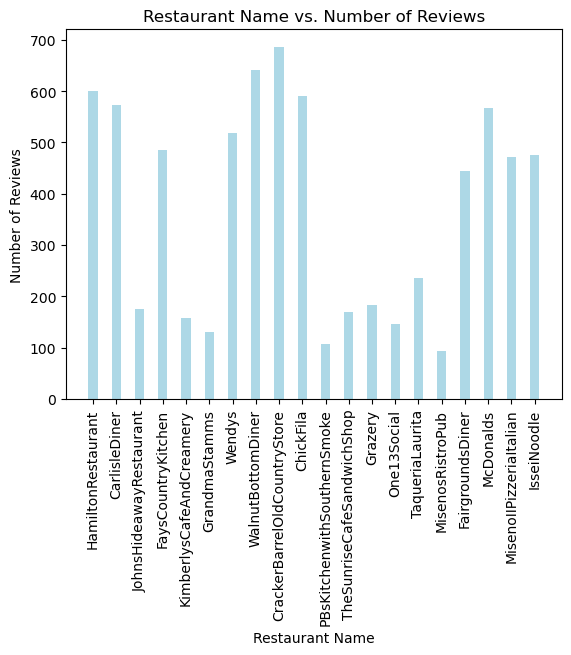

In [6]:
# initialize count list
count_list = []
# initialize an array that contains the names of all the present restaurants within the reviews dataframe
array = df_reviews["restaurant"].unique()
# iterate through each restaurant in our array of restaurants
for el in array:
    # use the reviews that contain the same restaurant name
    restaurant_df = df_reviews[df_reviews["restaurant"] == el]
    # append the length of each restaurant dataframe to count_list
    count_list.append(len(restaurant_df))

# rotate our x values 90 degrees to be vertical instead of horizontal to prevent overlap    
plt.xticks(rotation=90)
# assign our plot title
plt.title("Restaurant Name vs. Number of Reviews")
# assign our x axis label
plt.xlabel("Restaurant Name")
# assign our y axis label
plt.ylabel("Number of Reviews")
# construct a bar plot using the restaurant names for x and the number of reviews for y
plt.bar(df_reviews["restaurant"].unique(), count_list, color="lightblue", width=0.4)
# show the plot
plt.show()

# print the count_list which contains the amount of reviews per restaurant
print(count_list)

📌 By looking at the bar plot above, we are able to see the amount of reviews pertaining to each particular restaurant we are researching.  We can see that Cracker Barrel Old Country Store has the most reviews with a staggering count of 686 reviews, closely followed by Walnut Bottom Diner at 642 reviews and Hamilton Restaurant at 601 reviews.  It appears that the review counts for the restaurants differ greatly as 11 of the restaurants have a review count over 400 reviews, while the other 9 restaurants have a review count under 250 reviews.

HamiltonRestaurant Rating: 4.64559068219634
CarlisleDiner Rating: 4.185314685314685
JohnsHideawayRestaurant Rating: 4.508571428571429
FaysCountryKitchen Rating: 4.5473251028806585
KimberlysCafeAndCreamery Rating: 4.60126582278481
GrandmaStamms Rating: 4.461538461538462
Wendys Rating: 3.664092664092664
WalnutBottomDiner Rating: 3.965732087227414
CrackerBarrelOldCountryStore Rating: 3.6574344023323615
ChickFila Rating: 4.482233502538071
PBsKitchenwithSouthernSmoke Rating: 4.268518518518518
TheSunriseCafeSandwichShop Rating: 4.729411764705882
Grazery Rating: 4.7650273224043715
One13Social Rating: 4.639455782312925
TaqueriaLaurita Rating: 3.9279661016949152
MisenosRistroPub Rating: 4.623655913978495
FairgroundsDiner Rating: 4.175280898876404
McDonalds Rating: 3.2130281690140845
MisenoIIPizzeriaItalian Rating: 4.495762711864407
IsseiNoodle Rating: 4.467368421052631


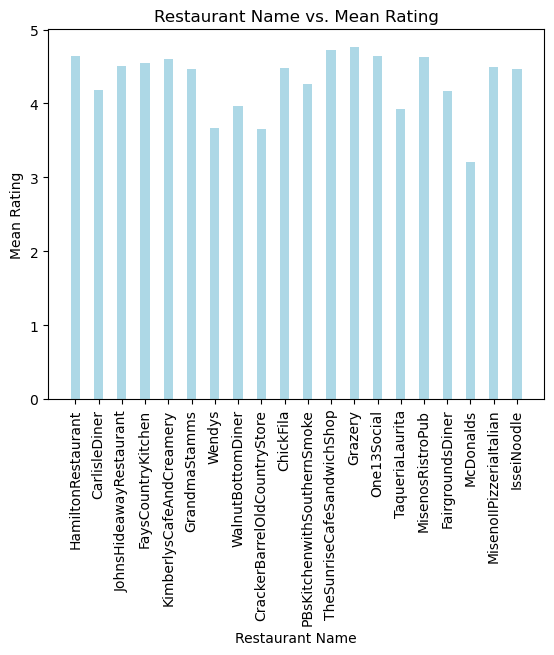

In [9]:
# initialize rating list
rating_list = []
# initialize an array that contains the names of all the present restaurants within the reviews dataframe
array = df_reviews["restaurant"].unique()
# iterate through each restaurant in our array of restaurants
for el in array:
    # use the reviews that contain the same restaurant name
    restaurant_df = df_reviews[df_reviews["restaurant"] == el]
    # obtain the mean rating for the restaurant
    rating_mean = restaurant_df["rating"].mean()
    # print the mean rating for the restaurant
    print(el + " Rating: " + str(rating_mean))
    # append the mean rating to rating_list
    rating_list.append(rating_mean)
# rotate our x values 90 degrees to be vertical instead of horizontal to prevent overlap    
plt.xticks(rotation=90)
# assign our plot title
plt.title("Restaurant Name vs. Mean Rating")
# assign our x axis label
plt.xlabel("Restaurant Name")
# assign our y axis label
plt.ylabel("Mean Rating")
# construct a bar plot using the restaurant names for x and the mean ratings for y
plt.bar(df_reviews["restaurant"].unique(), rating_list, color="lightblue", width=0.4)
# show the plot
plt.show()

📌 In terms of overall rating for our restaurants, we can see nearly all of our selected restaurants have a very high rating, with 15 of the 20 restaurants having over a 4.0 rating.  It seems that fast-food restaurants tend to have a lower rating with Wendys at a 3.7 rating and McDonalds at an abysmal 3.2 rating.  Chick-fil-A seems to escape this trend for fast-food restaurants with an impressive 4.5 rating.  The Grazery Restaurant seems to have the highest overall rating at 4.7 with many of our restaurants falling close to this figure.

Guide Rating: 4.6415094339622645 vs. Normal Rating: 4.65017667844523
Guide Rating: 4.234756097560975 vs. Normal Rating: 4.118852459016393
Guide Rating: 4.4935064935064934 vs. Normal Rating: 4.520408163265306
Guide Rating: 4.616724738675958 vs. Normal Rating: 4.447236180904523
Guide Rating: 4.473118279569892 vs. Normal Rating: 4.7846153846153845
Guide Rating: 4.484375 vs. Normal Rating: 4.4393939393939394
Guide Rating: 3.93030303030303 vs. Normal Rating: 3.1968085106382977
Guide Rating: 4.096514745308311 vs. Normal Rating: 3.7843866171003717
Guide Rating: 3.8118556701030926 vs. Normal Rating: 3.4563758389261743
Guide Rating: 4.5566750629722925 vs. Normal Rating: 4.329896907216495
Guide Rating: 4.350877192982456 vs. Normal Rating: 4.176470588235294
Guide Rating: 4.679012345679013 vs. Normal Rating: 4.775280898876405
Guide Rating: 4.833333333333333 vs. Normal Rating: 4.689655172413793
Guide Rating: 4.662650602409639 vs. Normal Rating: 4.609375
Guide Rating: 4.161971830985915 vs. Normal Ra

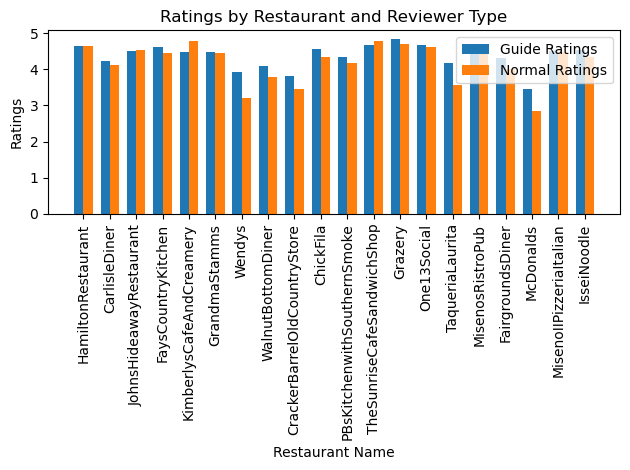

In [10]:
# rating comparisons local guides vs non-local guides
# initialize guide rating list
guideRatings_list = []
# initialize normal rating list
normalRatings_list = []

# split reviews into two separate dataframes (local vs non-local guides)
guide_ratings = df_reviews[df_reviews["stats"].str.contains("Local Guide")]
normal_ratings = df_reviews[~df_reviews["stats"].str.contains("Local Guide")]

# initialize an array that contains the names of all the present restaurants within the reviews dataframe
array = df_reviews["restaurant"].unique()
# iterate through each restaurant in our array of restaurants
for el in array:
    # use the reviews that contain the same restaurant name
    guide_rating = guide_ratings[guide_ratings["restaurant"] == el]
    # use the reviews that contain the same restaurant name
    normal_rating = normal_ratings[normal_ratings["restaurant"] == el]
    # obtain the guide mean rating for the restaurant
    guideRating_mean = guide_rating["rating"].mean()
    # obtain the normal mean rating for the restaurant
    normalRating_mean = normal_rating["rating"].mean()
    # append the guide mean rating to guideRatings_list
    guideRatings_list.append(guideRating_mean)
    # append the normal mean rating to normalRatings_list
    normalRatings_list.append(normalRating_mean)
    # print the guide and normal mean rating for the restaurant
    print("Guide Rating: " + str(guideRating_mean) + " vs. Normal Rating: " + str(normalRating_mean))

# transform nameList into an evenly spaced array     
x = np.arange(len(nameList))
# initialize width as 0.35
width = 0.35

# create a figure and set of subplots
fig, ax = plt.subplots()
# create a bar for guide ratings
rects1 = ax.bar(x - width/2, guideRatings_list, width, label='Guide Ratings')
# create a bar for normal ratings
rects2 = ax.bar(x + width/2, normalRatings_list, width, label='Normal Ratings')

# assign our plot title
ax.set_title('Ratings by Restaurant and Reviewer Type')
# assign our x axis label
ax.set_xlabel('Restaurant Name')
# assign our y axis label
ax.set_ylabel('Ratings')
# set xticks using x
ax.set_xticks(x)
# rotate our x values 90 degrees to be vertical instead of horizontal to prevent overlap    
plt.xticks(rotation=90)
# set xtick labels using nameList
ax.set_xticklabels(nameList)
# initialize our legend for the plot to show guide and normal rating colors
ax.legend()
# use tight_layout() function to fit the subplots into the figure area
fig.tight_layout()
# show the plot
plt.show()

📌 Based off of our grouped bar plots above, it seems that Local Guides tend to be more lenient in their ratings for a particular restaurant.  Only four restaurants see a lower overall rating from Local Guides as compared to Normal reviewers.  This could infer Local Guides are more collective and more consistent with their reviews while Normal reviewers may be more likely to leave a review when displeased with the quality of their food or service at a particular restaurant.  In general, Local Guides could focus on an overall evaluation of a restaurant while Normal reviewers focus more primarily on the bad elements of their experience.

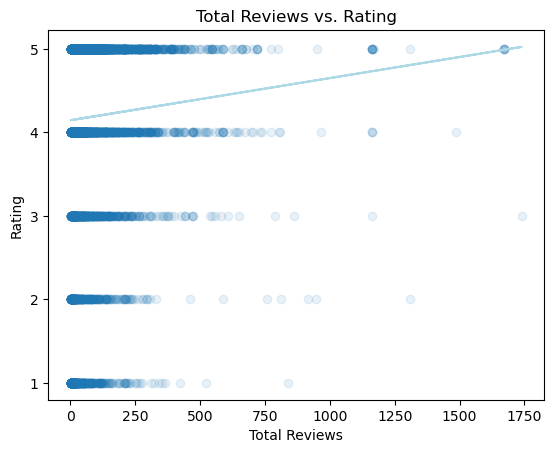

In [14]:
# initialize total reviews list
total_reviews = []
# iterate through the length of df_reviews
for i in range(len(df_reviews)):
    # create a list of statistics that are split using the " · " delimiter
    list = df_reviews["stats"].iloc[i].split(" · ")
    # iterate through each statistic in list
    for el in list:
        # checks if the statistic contains the string "reviews"
        if "reviews" in el:
            # obtain the total reviews after stripping the string "reviews"
            # and removing any commas
            reviews = int(el.strip(" reviews").replace(",", ""))
            # append the total reviews to our total_reviews list
            total_reviews.append(reviews)
        # checks if the statistic contains the string "review"
        elif "review" in el:
            # obtain the total reviews after stripping the string "review"
            # and removing any commas
            reviews = int(el.strip(" review").replace(",", ""))
            # append the total reviews to our total_reviews list
            total_reviews.append(reviews)

# convert our ratings_list into a python list
ratings_list = df_reviews["rating"].tolist()

# initialize the polyfit coefficients using total_reviews and ratings_list
co = np.polyfit(total_reviews, ratings_list, 1)
# initialize our line of best fit
bestFitLine = np.poly1d(co)
# set our y ticks to only contain the list of [1, 2, 3, 4, 5]
plt.yticks([1, 2, 3, 4, 5])
# assign our plot title
plt.title("Total Reviews vs. Rating")
# assign our x axis label
plt.xlabel("Total Reviews")
# assign our y axis label
plt.ylabel("Rating")
# construct a scatter plot using total_reviews as x and ratings_list as y
# while also using an alpha = 0.1 to show density of reviews in the plot
plt.scatter(total_reviews, ratings_list, alpha = 0.1)
# plot our line of best fit
plt.plot(total_reviews, bestFitLine(total_reviews), color="lightblue")
# show the plot
plt.show()

📌 When we try to draw a conclusion on the total reviews completed by a reviewer vs their given rating at a particular restaurant, we see some inconclusive results due to overlapping data points.  This is due to a majority of reviewers not being frequent critics as they may only leave a review due to an overly positive/negative experience at a restaurant.  This along with our limited rating values, which consist of only five possible choices (no decimals that could offer a better visualization), leads to a lacklusting scatter plot of our total reviews vs rating.  Our line of best fit shows a positive relationship between the increase of total reviews to the increase of rating, showing a potential correlation between these two variables.

In [13]:
# initialize our sentimentAnalyser object
sentimentAnalyser = SentimentIntensityAnalyzer()

# initialize sent list
sent_list = []
# select only the content column from df_reviews
df_test = df_reviews["content"]
# iterate through each content's text in df_test
for el in df_test:
    # append the sentimental scores of the content's text to our sent_list
    sent_list.append(sentimentAnalyser.polarity_scores(el))

# initialize neg list
neg_list = []
# initialize neu list
neu_list = []
# initialize pos list
pos_list = []
# initialize compound list
compound_list = []
# iterate through each sentimental score in sent_list
for el in sent_list:
    # append the neg score to neg_list
    neg_list.append(el.get("neg"))
    # append the neu score to neu_list
    neu_list.append(el.get("neu"))
    # append the pos score to pos_list
    pos_list.append(el.get("pos"))
    # append the compound score to compound_list
    compound_list.append(el.get("compound"))

# create a new dataframe to add our sentimental scores to
df_testing = df_reviews
# make a new neg column with neg_list
df_testing["neg"] = neg_list
# make a new neu column with neu_list
df_testing["neu"] = neu_list
# make a new pos column with pos_list
df_testing["pos"] = pos_list
# make a new compound column with compound_list
df_testing["compound"] = compound_list

# print the first five reviews within the df_testing dataframe
df_testing.head()

,restaurant,content,name,stats,time,rating,neg,neu,pos,compound
0,HamiltonRestaurant,"I cannot say enough good things about this place. It was really crowded due to the ice fest of all, but we still got waited on really quickly. Our food was out in less than 10 minutes. The hot dog...",Linda Duncan,Local Guide · 438 reviews · 945 photos,2 months ago,5,0.018,0.662,0.320,0.9858
1,HamiltonRestaurant,"We just got take out tonight. Anytime I go to the Hamilton it is Hotchee Dogs with everything for me. The dogs are always great, and the service is great too! The staff at the Hamilton is always s...",Greg Musser,9 reviews · 2 photos,2 months ago,5,0.000,0.683,0.317,0.9821
2,HamiltonRestaurant,"Missed this restaurant last time we were here on business. It's cash only! The waitress was a very wonderful older woman with a bursting personality. She brought us a chili dog to share, just...",Diane Zuber,Local Guide · 265 reviews · 502 photos,5 months ago,5,0.022,0.865,0.113,0.9478
3,HamiltonRestaurant,"Authentic gyro!!! Everything is highest quality!!! The staff is legendary. Friendly, clean, quick, delicious. Worth a special trip. Tommy is iconic 💗",Dory Maguire,10 reviews · 29 photos,4 months ago,5,0.000,0.429,0.571,0.9651
4,HamiltonRestaurant,The hot dog was good.\nThe crab cakes a bit dry.\nThe omelette was ok.\nWe enjoyed our visit though and you should visit for historic sake.,Ryan Donald,"Local Guide · 721 reviews · 3,184 photos",8 months ago,5,0.000,0.801,0.199,0.7351


HamiltonRestaurant Compound: 0.6450282861896848
CarlisleDiner Compound: 0.5739776223776241
JohnsHideawayRestaurant Compound: 0.6478862857142852
FaysCountryKitchen Compound: 0.6540160493827176
KimberlysCafeAndCreamery Compound: 0.6729297468354427
GrandmaStamms Compound: 0.6498907692307686
Wendys Compound: 0.3431206563706569
WalnutBottomDiner Compound: 0.6190401869158882
CrackerBarrelOldCountryStore Compound: 0.4075994169096214
ChickFila Compound: 0.5955172588832505
PBsKitchenwithSouthernSmoke Compound: 0.6364083333333338
TheSunriseCafeSandwichShop Compound: 0.783445882352942
Grazery Compound: 0.7695672131147542
One13Social Compound: 0.7668170068027207
TaqueriaLaurita Compound: 0.506682627118644
MisenosRistroPub Compound: 0.6457204301075263
FairgroundsDiner Compound: 0.5588665168539333
McDonalds Compound: 0.18983204225352107
MisenoIIPizzeriaItalian Compound: 0.6254002118644085
IsseiNoodle Compound: 0.6509593684210528


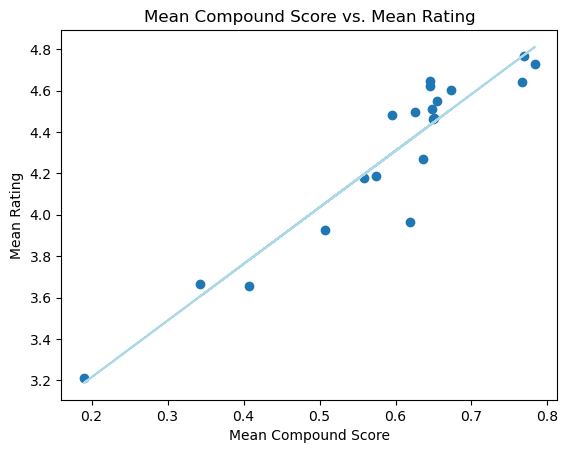

In [16]:
# initialize compound list
compound_list = []
# initialize an array that contains the names of all the present restaurants within the reviews dataframe
array = df_reviews["restaurant"].unique()
# iterate through each restaurant in our array of restaurants
for el in array:
    # use the reviews that contain the same restaurant name
    restaurant_df = df_reviews[df_reviews["restaurant"] == el]
    # obtain the mean compound score for the restaurant
    compound_mean = restaurant_df["compound"].mean()
    # print the mean compound score for the restaurant
    print(el + " Compound: " + str(compound_mean))
    # append the mean compound score to compound_list
    compound_list.append(compound_mean)

# initialize the polyfit coefficients using compound_list and rating_list
co = np.polyfit(compound_list, rating_list, 1)
# initialize our line of best fit
bestFitLine = np.poly1d(co)

# assign our plot title
plt.title("Mean Compound Score vs. Mean Rating")
# assign our x axis label
plt.xlabel("Mean Compound Score")
# assign our y axis label
plt.ylabel("Mean Rating")
# construct a scatter plot using compound_list as x and rating_list as y
plt.scatter(compound_list, rating_list)
# plot our line of best fit
plt.plot(compound_list, bestFitLine(compound_list), color="lightblue")
# show the plot
plt.show()

📌 In this scatterplot, we are able to see a strong positive linear relationship between compound sentimental score and rating.  This shows that our reviews follow an expected pattern as the more positive a review is, the higher the rating it will have.  By having this line of best fit, we can see how a review may lean more towards a lower/higher rating based off of the nature within the review's content.  This provides a potential fix to visualize what rating a review truly equates to as the reviewers are limited to little options (1, 2, 3, 4, 5) for rating.

C:\Users\micha\AppData\Local\Temp\ipykernel_36804\432657353.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_ratings['time'] = recent_ratings['time'].str.replace('months ago', '')
C:\Users\micha\AppData\Local\Temp\ipykernel_36804\432657353.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_ratings['time'] = recent_ratings['time'].str.replace('a month ago', '1')


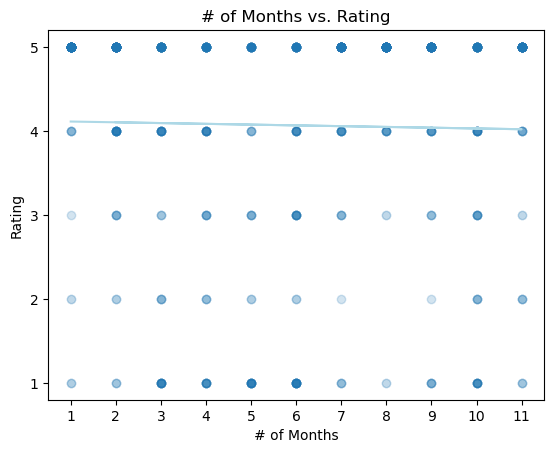

In [17]:
# monthly averages for rating

# use last 12 months due to not being able to tell beyond that
# select the time for reviews that are less than a year old
recent_ratings = df_reviews[df_reviews["time"].str.contains("month")]

# remove the string "months ago" from all observations within the time column that contain it
recent_ratings['time'] = recent_ratings['time'].str.replace('months ago', '')
# replace the string "a month ago" from all observations within the time column that contain it with "1"
recent_ratings['time'] = recent_ratings['time'].str.replace('a month ago', '1')

# reset the indices of our new dataframe
recent_ratings = recent_ratings.reset_index(drop=True)
# convert all values in the time column from string to int
recent_ratings['time'] = recent_ratings['time'].astype(int)

# convert the time column into a python list
x = recent_ratings["time"].tolist()
# convert the rating column into a python list
y = recent_ratings["rating"].tolist()

# initialize the polyfit coefficients using x and y
co = np.polyfit(x, y, 1)
# initialize our line of best fit
bestFitLine = np.poly1d(co)

# set our x ticks to only contain the list of [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
# set our y ticks to only contain the list of [1, 2, 3, 4, 5]
plt.yticks([1, 2, 3, 4, 5])
# assign our plot title
plt.title("# of Months vs. Rating")
# assign our x axis label
plt.xlabel("# of Months")
# assign our y axis label
plt.ylabel("Rating")
# construct a scatter plot using x (sorted) and y
# while also using an alpha = 0.1 to show density of reviews in the plot
plt.scatter(sorted(x), y, alpha=0.1)
# plot our line of best fit
plt.plot(x, bestFitLine(x), color="lightblue")
# show the plot
plt.show()

With the nature of Google Reviews' time posted feature, we are limited to finding out if there is a true relationship between time and rating.  Google Reviews only contains a time description of 1-11 months, with increments of years succeeding that time layout.  This prevents us from following the direction a restaurant is going in using reviews older than a year.  Despite this challenge, this scatterplot shows there is little to no relationship between these variables.  Our line of best fit does not do a good job predicting rating either as it is a nearly horizontal line across our graph.

# NLP

📌 We are able to use GPT-4 for our NLP summarization task with its various powerful models.  This Generative Pre-trained Transformer is a multimodal large language model created by OpenAI developers that allows users to use written prompts for a generated answer using large collections of text data and internet browsing (introduced in GPT-4).  This results in us being able to utilize the model's generative power in summarizing our reviews for the restaurants we are researching.  In a world with an accelerating rate of technological advances, this GPT-4 model shows the promise of what AI can achieve and what it will continue to grow into as the years go on.

In [ ]:
# initialize our api key for openai, this is dependent on the person using it so you will have to
# obtain your api key at https://platform.openai.com/api-keys
openai.api_key = ""

# define summarize_reviews func
def summarize_reviews(reviews_list, summary_length):
    # gather all of the reviews into one text for the model to summarize
    reviews_text = '\n'.join(reviews_list)
    # initialize the gpt prompt that the gpt program will attempt to answer
    prompt = f"Please summarize the following list of reviews:\n\n{reviews_text}\n\nSummary:"
    # create a chat completion object to determine what features we will be using in this model
    response = openai.ChatCompletion.create(
        # we will be using the gpt-4-turbo model, which can handle up to 128,000 tokens
        model="gpt-4-turbo",
        # assign roles for the model to use
        messages=[
            {"role": "system", "content": "You are a helpful assistant"},
            {"role": "user", "content": prompt}
        ],
        # initializes the max_tokens, or length of the provided answer, based off our input of summary_length
        max_tokens=summary_length,
        # set the temperature (randomness/creativity of output) to 0.7
        temperature=0.7
    )
    # select the generated summary
    summary = response.choices[0].message.content.strip()
    
    # return the generated summary
    return summary

# initialize count to 0
count = 0
# iterate through the list of reviews for each restaurant
for el in reviews_list:
    # generate a summarized text of the list of reviews, with a max length of 100 words
    summary = summarize_reviews(el, 100)
    # print the name of the restaurant being summarized
    print("----------" + nameList[count] + "----------")
    # print the generated summary of the restaurant
    print(summary)
    # print a separator between restaurant summarizations
    print("--------------------")
    # increment count by 1
    count = count + 1

In [19]:
# set column width to max to help prevent cut-offs of the summary texts
pd.set_option('display.max_colwidth', None)
# loads the pandas dataframe for summarized reviews obtained from running the code above 📁
df_summaries = pd.read_csv(r"C:\Users\micha\Downloads\generatedSummarys.csv")

In [20]:
# show the dataframe of the summarized review for each restaurant
df_summaries

,restaurant,summary
0,HamiltonRestaurant,"The reviews for The Hamilton are overwhelmingly positive, highlighting the restaurant as a beloved local spot with a warm, family-friendly atmosphere. Customers frequently rave about the ""hotchee dogs,"" a signature dish, along with other menu items like gravy fries, breakfast offerings, and homemade desserts. The service is consistently described as friendly and quick, contributing to a pleasant dining experience. Despite being cash-only, the value for money and homemade quality of the food receive high praise. Some reviews mention the restaurant's old-fashioned"
1,CarlisleDiner,"The diner generally offers a great variety of food with many customers praising the extensive menu, good value, and generous portions. Highlights include breakfast items like omelets and the Carlisle Feast, and the service is often described as fast, friendly, and attentive. However, there are mixed reviews regarding the quality of some dishes, with a few patrons finding certain food items either mediocre or poorly prepared. Complaints about service inconsistencies, such as slow service or incorrect orders, are noted but not predominant. The"
2,JohnsHideawayRestaurant,"The reviews reveal a strong appreciation for the restaurant's home-cooked, comfort food offered at reasonable prices, creating a cozy and welcoming atmosphere. Many patrons appreciate the friendly service and the feeling of being treated like family. Breakfast seems to be a particularly popular time to visit, with special mentions of homemade items like sausage and pies. Despite mostly positive feedback, there are a few complaints regarding inconsistent quality, portion sizes, and a couple of negative experiences with specific dishes. Overall, the restaurant is highly recommended by"
3,FaysCountryKitchen,"The reviews for the restaurant present a mixed bag of experiences. Many patrons praise the friendly staff, cozy atmosphere, and the unique decor featuring Coca-Cola memorabilia. The breakfast menu, particularly the skillets and pancakes, receives numerous positive mentions, with some claiming it offers the best pancakes they've ever had. The Hawaiian pancakes and pecan pancakes were highlighted as favorites."
4,KimberlysCafeAndCreamery,"The majority of the reviews are overwhelmingly positive, praising the food, service, and atmosphere of the restaurant. Many customers enjoyed the home-style cooking, large portions, and reasonable prices. Special mentions were made of the breakfast items like omelets, French toast, pancakes, and specialty items like quiche. The service was frequently described as friendly, attentive, and accommodating, contributing to a welcoming dining experience. However, there were a few negative experiences noted, primarily regarding inconsistent food quality and service on particular"
5,GrandmaStamms,"This restaurant has garnered a variety of reviews, with many praising its delicious food, especially the smash burgers, fried chicken, and mac and cheese. The establishment has undergone changes in ownership, which seems to have positively influenced the menu diversity and quality. Customers have highlighted the friendly and accommodating nature of the owners and staff, adding to the restaurant's warm and welcoming atmosphere. Many reviews recommend trying the food here, noting the affordability and the home-cooked style meals. However, a few reviewers noted some issues"
6,Wendys,"The reviews for this Wendy's location are mixed, with numerous negative comments about incorrect orders, slow service, and unprofessional staff behavior. There are complaints about cold and poorly prepared food, and some reviewers mention rude employees and management. However, there are also positive remarks about friendly staff, good food quality in some instances, and appreciation for hot and fresh orders when received correctly. Overall, there seems to be inconsistency in service and food quality, with multiple instances of customer dissatisfac

In [21]:
# initialize our sentimentAnalyser object
sentimentAnalyser = SentimentIntensityAnalyzer()

# initialize sent list
sent_list = []
# select only the summary column from df_summaries
df_summariesList = df_summaries["summary"]
# iterate through each summarized review in df_summariesList
for el in df_summariesList:
    # append the sentimental scores of the summary's text to our sent_list
    sent_list.append(sentimentAnalyser.polarity_scores(el))

# initialize neg list
neg_list = []
# initialize neu list
neu_list = []
# initialize pos list
pos_list = []
# initialize compound list
compound_list = []
# iterate through each sentimental score in sent_list
for el in sent_list:
    # append the neg score to neg_list
    neg_list.append(el.get("neg"))
    # append the neu score to neu_list
    neu_list.append(el.get("neu"))
    # append the pos score to pos_list
    pos_list.append(el.get("pos"))
    # append the compound score to compound_list
    compound_list.append(el.get("compound"))

# create a new dataframe to add our sentimental scores to
df_summariesSent = df_summaries
# make a new neg column with neg_list
df_summariesSent["neg"] = neg_list
# make a new neu column with neu_list
df_summariesSent["neu"] = neu_list
# make a new pos column with pos_list
df_summariesSent["pos"] = pos_list
# make a new compound column with compound_list
df_summariesSent["compound"] = compound_list

# print the first five reviews within the df_summariesSent dataframe
df_summariesSent.head()

,restaurant,summary,neg,neu,pos,compound
0,HamiltonRestaurant,"The reviews for The Hamilton are overwhelmingly positive, highlighting the restaurant as a beloved local spot with a warm, family-friendly atmosphere. Customers frequently rave about the ""hotchee dogs,"" a signature dish, along with other menu items like gravy fries, breakfast offerings, and homemade desserts. The service is consistently described as friendly and quick, contributing to a pleasant dining experience. Despite being cash-only, the value for money and homemade quality of the food receive high praise. Some reviews mention the restaurant's old-fashioned",0.015,0.740,0.245,0.9694
1,CarlisleDiner,"The diner generally offers a great variety of food with many customers praising the extensive menu, good value, and generous portions. Highlights include breakfast items like omelets and the Carlisle Feast, and the service is often described as fast, friendly, and attentive. However, there are mixed reviews regarding the quality of some dishes, with a few patrons finding certain food items either mediocre or poorly prepared. Complaints about service inconsistencies, such as slow service or incorrect orders, are noted but not predominant. The",0.020,0.791,0.189,0.8910
2,JohnsHideawayRestaurant,"The reviews reveal a strong appreciation for the restaurant's home-cooked, comfort food offered at reasonable prices, creating a cozy and welcoming atmosphere. Many patrons appreciate the friendly service and the feeling of being treated like family. Breakfast seems to be a particularly popular time to visit, with special mentions of homemade items like sausage and pies. Despite mostly positive feedback, there are a few complaints regarding inconsistent quality, portion sizes, and a couple of negative experiences with specific dishes. Overall, the restaurant is highly recommended by",0.082,0.615,0.303,0.9689
3,FaysCountryKitchen,"The reviews for the restaurant present a mixed bag of experiences. Many patrons praise the friendly staff, cozy atmosphere, and the unique decor featuring Coca-Cola memorabilia. The breakfast menu, particularly the skillets and pancakes, receives numerous positive mentions, with some claiming it offers the best pancakes they've ever had. The Hawaiian pancakes and pecan pancakes were highlighted as favorites.",0.000,0.756,0.244,0.9545
4,KimberlysCafeAndCreamery,"The majority of the reviews are overwhelmingly positive, praising the food, service, and atmosphere of the restaurant. Many customers enjoyed the home-style cooking, large portions, and reasonable prices. Special mentions were made of the breakfast items like omelets, French toast, pancakes, and specialty items like quiche. The service was frequently described as friendly, attentive, and accommodating, contributing to a welcoming dining experience. However, there were a few negative experiences noted, primarily regarding inconsistent food quality and service on particular",0.053,0.701,0.246,0.9584


HamiltonRestaurant Compound: 0.9694
CarlisleDiner Compound: 0.891
JohnsHideawayRestaurant Compound: 0.9689
FaysCountryKitchen Compound: 0.9545
KimberlysCafeAndCreamery Compound: 0.9584
GrandmaStamms Compound: 0.9643
Wendys Compound: 0.0772
WalnutBottomDiner Compound: 0.9796
CrackerBarrelOldCountryStore Compound: 0.9313
ChickFila Compound: 0.6705
PBsKitchenwithSouthernSmoke Compound: 0.9798
TheSunriseCafeSandwichShop Compound: 0.8834
Grazery Compound: 0.9902
One13Social Compound: 0.9412
TaqueriaLaurita Compound: 0.9517
MisenosRistroPub Compound: 0.9779
FairgroundsDiner Compound: 0.9601
McDonalds Compound: 0.836
MisenoIIPizzeriaItalian Compound: 0.9601
IsseiNoodle Compound: 0.9267
HamiltonRestaurant Rating: 4.64559068219634
CarlisleDiner Rating: 4.185314685314685
JohnsHideawayRestaurant Rating: 4.508571428571429
FaysCountryKitchen Rating: 4.5473251028806585
KimberlysCafeAndCreamery Rating: 4.60126582278481
GrandmaStamms Rating: 4.461538461538462
Wendys Rating: 3.664092664092664
WalnutBot

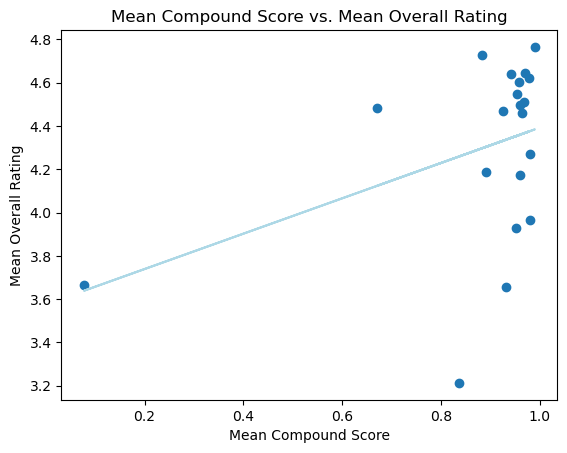

In [23]:
# initialize compound list
compound_list = []
# initialize an array that contains the names of all the present restaurants within the summariesSent dataframe
array = df_summariesSent["restaurant"].unique()
# iterate through each restaurant in our array of restaurants
for el in array:
    # use the reviews that contain the same restaurant name
    restaurant_df = df_summariesSent[df_summariesSent["restaurant"] == el]
    # obtain the mean compound score for the restaurant
    compound_mean = restaurant_df["compound"].mean()
    # print the mean compound score for the restaurant
    print(str(el) + " Compound: " + str(compound_mean))
    # append the mean compound score to compound_list
    compound_list.append(compound_mean)

# initialize overallRating list
overallRating_list = []
# initialize an array that contains the names of all the present restaurants within the summariesSent dataframe
array = df_summariesSent["restaurant"].unique()
# iterate through each restaurant in our array of restaurants
for el in array:
    # use the reviews that contain the same restaurant name
    restaurant_df = df_reviews[df_reviews["restaurant"] == el]
    # obtain the mean rating for the restaurant
    rating_mean = restaurant_df["rating"].mean()
    # print the mean rating for the restaurant
    print(str(el) + " Rating: " + str(rating_mean))
    # append the mean rating to overallRating_list
    overallRating_list.append(rating_mean)

# initialize the polyfit coefficients using compound_list and overallRating_list
co = np.polyfit(compound_list, overallRating_list, 1)
# initialize our line of best fit
bestFitLine = np.poly1d(co)

# assign our plot title
plt.title("Mean Compound Score vs. Mean Overall Rating")
# assign our x axis label
plt.xlabel("Mean Compound Score")
# assign our y axis label
plt.ylabel("Mean Overall Rating")
# construct a scatter plot using compound_list as x and overallRating_list as y
plt.scatter(compound_list, overallRating_list)
# plot our line of best fit
plt.plot(compound_list, bestFitLine(compound_list), color="lightblue")
# show the plot
plt.show()

📌 In this scatterplot, we are able to see a weak positive linear relationship between compound sentimental score and rating.  This shows that our reviews does not seem to follow the expected pattern of the more positive a review is, the higher the rating it will have.  Our line of best fit does a poor job in this example as it is heavily influenced by outliers, and even without these outliers, our data points are within the 0.8 to 1.0 compound score range.  This means compound score has little influence on the ratings for our summarized restaurant reviews.

# Conclusion 🏁

Through our exploratory procedures and our generative text summaries, we are able to go beyond the initial rating figure for a restaurant.  By diving deeper into the small details, we can predict future ratings on various variables such as total reviews, compound sentimental scores, and other factors.  It is important we take all of these into consideration when deciding if a restaurant is a good or bad place to eat from based off of previous encounters by reviewers.  Don't forget to leave your feedback as well when you visit a restaurant so your experience can be used to evaluate the same discoveries as seen above! 😊